## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata, study_results,
                            how='right', on='Mouse ID')


# Display the data table for preview
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [8]:
# Checking the number of mice.
mouse_count = combo_df["Mouse ID"].count()
mouse_count

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combo_df[combo_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
861,g989,Propriva,Female,21,26,0,45.000000,0
863,g989,Propriva,Female,21,26,5,47.570392,0
865,g989,Propriva,Female,21,26,10,49.880528,0
867,g989,Propriva,Female,21,26,15,53.442020,0
869,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = combo_df[combo_df.duplicated(['Mouse ID',])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
5,b128,Capomulin,Female,9,22,25,43.262145,1
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combo_df.drop_duplicates("Mouse ID")
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
10,f932,Ketapril,Male,15,29,0,45.0,0
11,g107,Ketapril,Female,2,29,0,45.0,0
19,a457,Ketapril,Female,11,30,0,45.0,0
22,c819,Ketapril,Male,21,25,0,45.0,0
...,...,...,...,...,...,...,...,...
1848,t565,Capomulin,Female,20,17,0,45.0,0
1858,i557,Capomulin,Female,1,24,0,45.0,0
1868,m957,Capomulin,Female,3,19,0,45.0,0
1878,f966,Capomulin,Male,16,17,0,45.0,0


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleaned_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sum_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



# Using the aggregation method, produce the same summary statistics in a single line
sum_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sum_df.aggregate(['sum'])

,Mean,Median,Variance,Standard Deviation,SEM
sum,509.761444,499.429596,477.083455,68.09671,4.996406


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = pd.DataFrame(combo_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_count[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

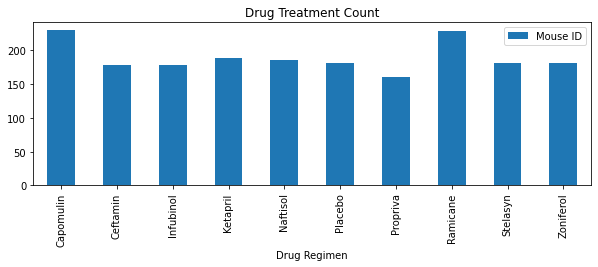

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combo_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

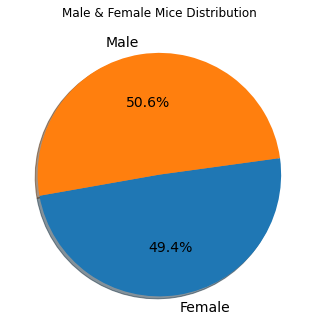

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Distribution")
plt.xlabel("")
plt.ylabel("")

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combo_df.head()
# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(combo_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(combo_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45


In [30]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tvol_values = []

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    
    # add subset 
    sub_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    values = sub_df['Tumor Volume (mm3)']
    tvol_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # check for outliers
    outliers_count = (values.loc[(sub_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (sub_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


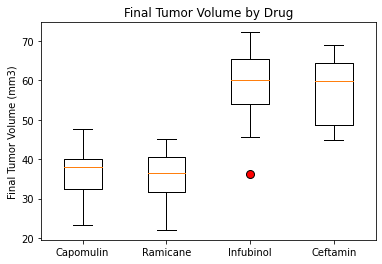

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tvol_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
